# Visualizing COVID-19 Data

- This notebook uses a dataset from https://covid19.healthdata.org/
- The specific download link is https://ihmecovid19storage.blob.core.windows.net/latest/ihme-covid19.zip

Citation: Institute for Health Metrics and Evaluation (IHME). United States COVID-19 Hospital Needs and Death Projections. Seattle, United States of America: Institute for Health Metrics and Evaluation (IHME),
University of Washington, 2020.

#### First, the imports, we're adding pandas this time.


In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

Importing a csv is a one line operation with pandas.  Note that a parameter was added to parse the dates.  We could have done this after the fact with `df['date_reported'] = pd.to_datetime(df['date_reported'])`

In [8]:
df = pd.read_csv('ihme_data/hospitalization_all_locs_corrected.csv', parse_dates=['date_reported'])

We can explore the data a bit by seeing the colums and look at the locations.

In [9]:
df.columns

Index(['location_name', 'date_reported', 'allbed_mean', 'allbed_lower',
       'allbed_upper', 'ICUbed_mean', 'ICUbed_lower', 'ICUbed_upper',
       'InvVen_mean', 'InvVen_lower', 'InvVen_upper', 'deaths_mean',
       'deaths_lower', 'deaths_upper', 'admis_mean', 'admis_lower',
       'admis_upper', 'newICU_mean', 'newICU_lower', 'newICU_upper',
       'totdea_mean', 'totdea_lower', 'totdea_upper', 'bedover_mean',
       'bedover_lower', 'bedover_upper', 'icuover_mean', 'icuover_lower',
       'icuover_upper'],
      dtype='object')

In [10]:
set(df.location_name)

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'King and Snohomish Counties (excluding Life Care Center), WA',
 'Life Care Center, Kirkland, WA',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Other Counties, WA',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'United States of America',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

### Note that 'United States' is in the data!  We'll need to eliminate that for our processing below.

In [11]:
df[df['location_name']=='United States of America']['totdea_mean'].sum()

8464313.572000002

In [12]:
df['totdea_mean'].sum()

17061032.183

In [13]:
df[~(df['location_name']=='United States of America')]['totdea_mean'].sum()

8596718.611

In [14]:
df_states = df[~(df['location_name']=='United States of America')]
df_states.reset_index(inplace=True, drop=True)
df_states

,location_name,date_reported,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,...,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper
0,Alabama,2020-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Alabama,2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Alabama,2020-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alabama,2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Alabama,2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9769,Wyoming,2020-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135.813,59.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0
9770,Wyoming,2020-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135.813,59.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0
9771,Wyoming,2020-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135.813,59.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0
9772,Wyoming,2020-08-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,135.813,59.0,224.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df_usa = df[df['location_name']=='United States of America']
df_usa.reset_index(inplace=True, drop=True)
df_usa

,location_name,date_reported,allbed_mean,allbed_lower,allbed_upper,ICUbed_mean,ICUbed_lower,ICUbed_upper,InvVen_mean,InvVen_lower,...,newICU_upper,totdea_mean,totdea_lower,totdea_upper,bedover_mean,bedover_lower,bedover_upper,icuover_mean,icuover_lower,icuover_upper
0,United States of America,2020-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,United States of America,2020-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
2,United States of America,2020-02-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
3,United States of America,2020-02-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
4,United States of America,2020-02-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,United States of America,2020-07-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81113.73,38241.5,162106.075,0.0,0.0,0.0,0.0,0.0,0.0
177,United States of America,2020-08-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81113.73,38241.5,162106.075,0.0,0.0,0.0,0.0,0.0,0.0
178,United States of America,2020-08-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81113.73,38241.5,162106.075,0.0,0.0,0.0,0.0,0.0,0.0
179,United States of America,2020-08-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,81113.73,38241.5,162106.075,0.0,0.0,0.0,0.0,0.0,0.0


Back to the program...

In [16]:
df_states['date_reported']

0      2020-02-06
1      2020-02-07
2      2020-02-08
3      2020-02-09
4      2020-02-10
          ...    
9769   2020-07-31
9770   2020-08-01
9771   2020-08-02
9772   2020-08-03
9773   2020-08-04
Name: date_reported, Length: 9774, dtype: datetime64[ns]

Note that the `dtype` is `datetime64` due to the date parsing.  This will make our plots look nicer later, but adds some complication.

#### Aggregation

Pandas can very simply extract subsets of the data and aggregrate them.  Here, we obtain some columns and sum up the counts by date.

In [17]:
grouped = df_states[['totdea_mean','totdea_upper','totdea_lower']].groupby(df['date_reported']).sum()
grouped.index.freq='D'
grouped.sort_index(inplace=True)

Now to plot this.  To narrow the date range down, we define a figure rather than the usual shortcut, and set limits on the x axis.  Since the index is in datetime, we have to use the datetime model to set the range.

(737485.0, 737638.0)

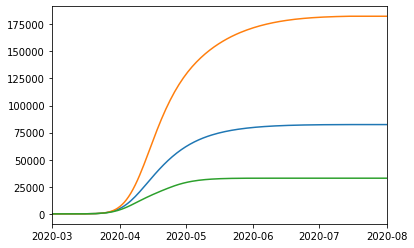

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(grouped.index,grouped['totdea_mean'])
ax.plot(grouped.index,grouped['totdea_upper'])
ax.plot(grouped.index,grouped['totdea_lower'])
ax.set_xlim([dt.date(2020, 3, 1), dt.date(2020, 8, 1)])

Pandas has a plot function as well to make things easier.  Note that the dates are auto-parsed from within Pandas.

(18322, 18475)

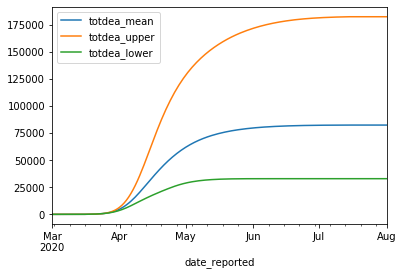

In [19]:
ax = grouped.plot()
ax.set_xlim(['3/1/2020', '8/1/2020'])

In [20]:
ax.set_xlim(['3/1/2020', '8/1/2020'])

(18322, 18475)

Zooming in.

(737502.0, 737533.0)

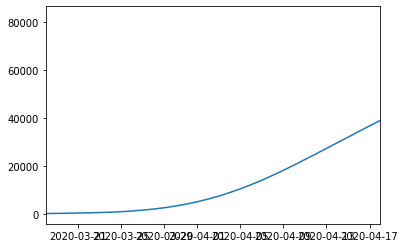

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(grouped.index,grouped['totdea_mean'])
ax.set_xlim([dt.date(2020, 3, 18), dt.date(2020, 4, 18)])

The dates are kind of messy.  We know the year, so let's make the plot more readable.  We can also zoom in on the y axis as well.  Note to make the range more readable on the y axis, the underscore is used to represent the thousands marker.  60_000 is more readable than 60000.

(0, 60000)

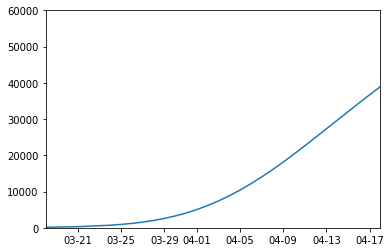

In [22]:
from matplotlib.dates import DateFormatter
fmt_md = DateFormatter("%m-%d")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(grouped.index,grouped['totdea_mean'])
ax.set_xlim([dt.date(2020, 3, 18), dt.date(2020, 4, 18)])
ax.xaxis.set_major_formatter(fmt_md)
ax.set_ylim([0, 60_000])

Pull out one day to check the numbers.  See that the values are all the same - this is data, not a prediction.

In [23]:
grouped.loc['2020-03-05']

totdea_mean     21.0
totdea_upper    21.0
totdea_lower    21.0
Name: 2020-03-05 00:00:00, dtype: float64

We can find the date the model goes to predictive using a slice.  I downloaded the data on the 29th, so I looked around then.

In [24]:
grouped['2020-03-22':'2020-04-01']

,totdea_mean,totdea_upper,totdea_lower
date_reported,,,
2020-03-22,440.000,440.000,440.000
2020-03-23,555.000,555.000,555.000
2020-03-24,709.000,709.000,709.000
2020-03-25,931.525,985.000,893.000
2020-03-26,1216.414,1342.100,1120.975
2020-03-27,1577.083,1813.125,1397.975
2020-03-28,2027.737,2415.150,1736.975
2020-03-29,2584.516,3184.200,2143.900
2020-03-30,3260.113,4159.300,2617.800
